##### ***Google stock (GOOGL) forcasting (2012-01-03  /   2021-08-30)***
##### Data copyright : https://finance.yahoo.com/quote/GOOGL/history?p=GOOGL

In [1]:
# import the important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from pylab import rcParams
rcParams['figure.figsize']=[14,6]
rcParams['figure.figsize']
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

In [2]:
#import the data and get the prices of the stock only starting from 2012
df= pd.read_csv('Downloads/GOOGL.csv',index_col=0,parse_dates=True)
dfx = df[['Close']].loc['2012':]
dfx=dfx.asfreq('B')

<AxesSubplot:xlabel='Date'>

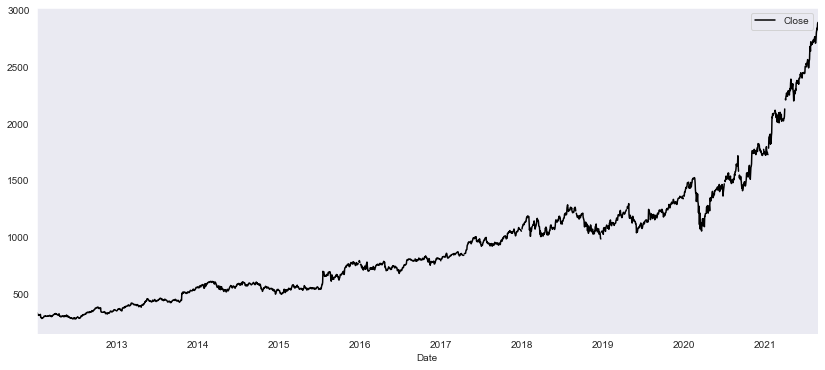

In [3]:
#Explore the data visiualy 
dfx.plot(c='k')

In [4]:
dfx.isnull().any(axis=0)

Close    True
dtype: bool

In [5]:
dfx=dfx.ffill()

In [6]:
dfx.isnull().any(axis=0)

Close    False
dtype: bool

In [7]:
# Exploring the seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
ETS = seasonal_decompose(dfx,model='multiplicative')

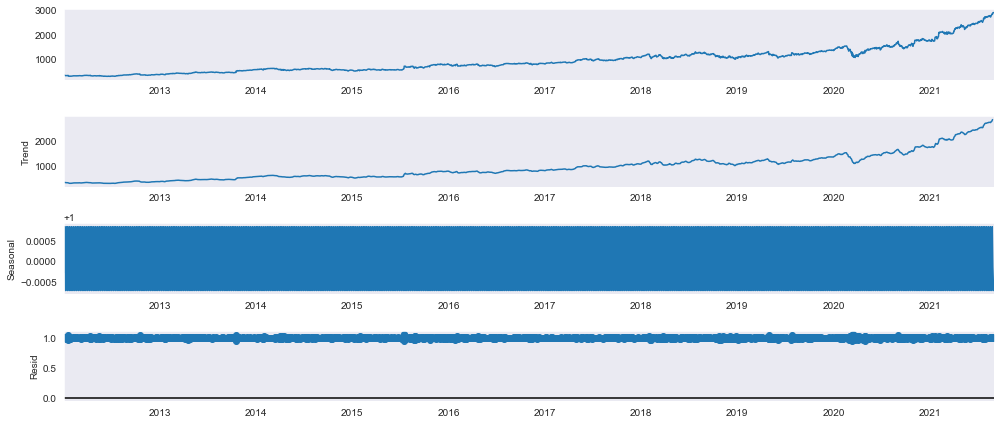

In [8]:
ETS.plot();

<AxesSubplot:xlabel='Date'>

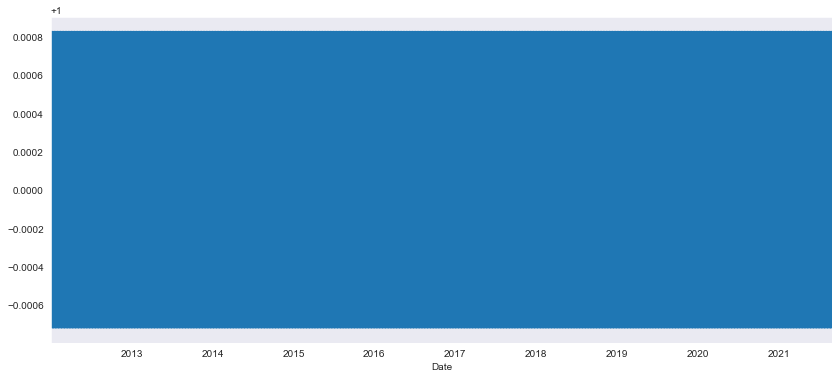

In [9]:
ETS.seasonal.plot()

<AxesSubplot:xlabel='Date'>

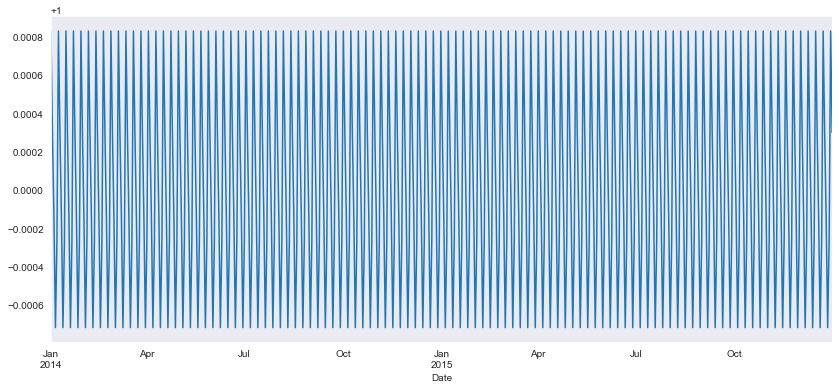

In [10]:
ETS.seasonal.loc['2014':'2015'].plot()

<AxesSubplot:xlabel='Date'>

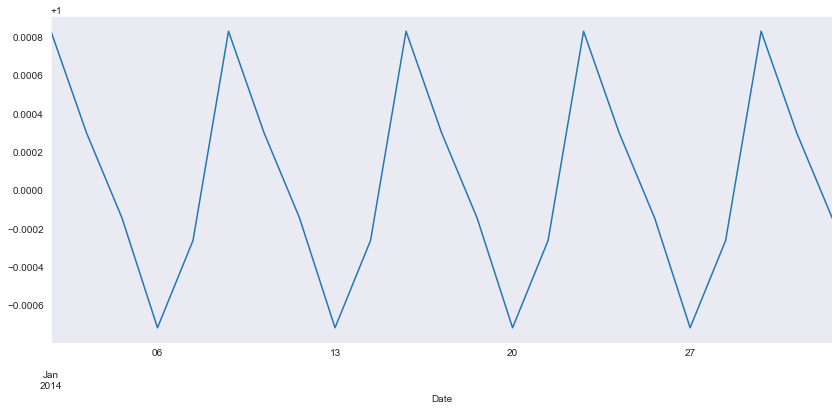

In [11]:
ETS.seasonal.loc['2014-01-01':'2014-01-31'].plot()

In [12]:
# This is a weekly seasonality

In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [14]:
alpha = 2 / (1+60)
dfx['EWMA60'] = SimpleExpSmoothing(dfx.Close).fit(alpha).fittedvalues.shift(-1)


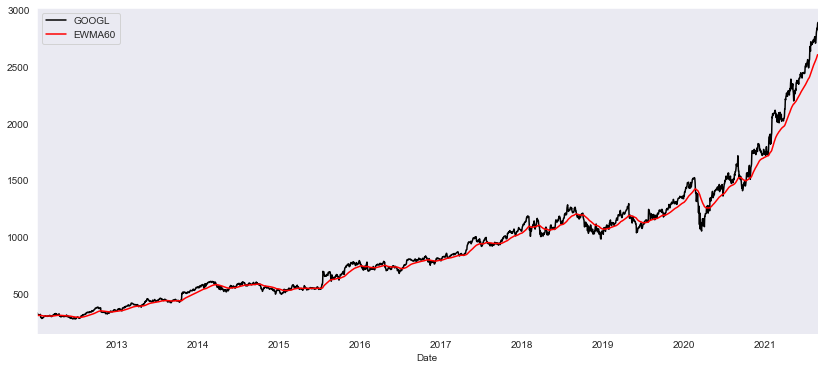

In [15]:
dfx.Close.plot(c="k",label = 'GOOGL')
dfx.EWMA60.plot(c="r",label = 'EWMA60')
plt.legend()

In [16]:
# I'am sure that the data is not stationary cus of non constand mean , but lets test it practicaly useing Augmented Dickey-Fuller unit root test.
from statsmodels.tsa.stattools import adfuller
p_val=adfuller(dfx.Close)[1]
print(f'P-Value = {p_val}')

P-Value = 1.0


In [17]:
# so we can't reject the null hypo

In [18]:
# Try with weakly seasonality

In [19]:
from pmdarima import auto_arima

In [20]:
# Making grid  search to get the best 
from pmdarima import auto_arima
a_ar = auto_arima(dfx.Close,seasonal=True,m=7,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[7]             : AIC=inf, Time=9.57 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=23433.624, Time=0.12 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=22473.099, Time=0.56 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=inf, Time=1.07 sec
 ARIMA(1,2,0)(0,0,0)[7]             : AIC=22491.103, Time=0.17 sec
 ARIMA(1,2,0)(2,0,0)[7]             : AIC=22468.310, Time=1.27 sec
 ARIMA(1,2,0)(2,0,1)[7]             : AIC=22470.291, Time=1.23 sec
 ARIMA(1,2,0)(1,0,1)[7]             : AIC=22469.396, Time=1.05 sec
 ARIMA(0,2,0)(2,0,0)[7]             : AIC=23376.773, Time=0.78 sec
 ARIMA(2,2,0)(2,0,0)[7]             : AIC=22120.023, Time=1.33 sec
 ARIMA(2,2,0)(1,0,0)[7]             : AIC=22119.834, Time=0.71 sec
 ARIMA(2,2,0)(0,0,0)[7]             : AIC=22142.862, Time=0.87 sec
 ARIMA(2,2,0)(1,0,1)[7]             : AIC=22120.123, Time=1.09 sec
 ARIMA(2,2,0)(0,0,1)[7]             : AIC=22121.351, Time=0.79 sec
 ARIMA(2,2,0)(2,0,1)[7]        

In [21]:
a_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 2520
Model:             SARIMAX(5, 2, 0)x(2, 0, 0, 7)   Log Likelihood              -10911.532
Date:                           Thu, 02 Sep 2021   AIC                          21839.063
Time:                                   18:54:22   BIC                          21885.713
Sample:                                        0   HQIC                         21855.993
                                          - 2520                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9070      0.011    -82.208      0.000      -0.929      -0.885
ar.L2         -0.6956      0.015    -45.673      0.000      -0.725      -0.666
ar.L3         -0.4834      0.017    -28.410      0.000      -0.517      -0.450
ar.L4         -0.3050      0.015    -19.920      0.000      -0.335      -0.275
ar.L5         -0.1549      0.012    -12.426      0.000      -0.179      -0.130
ar.S.L7        0.1052      0.012      8.450      0.000       0.081       0.130
ar.S.L14       0.0312      0.013      2.317      0.021       0.005       0.058
sigma2       339.8505      4.345     78.219      0.000     331.335     348.366
===================================================================================
Ljung-Box (L1) (Q):                   1.35   Jarque-Bera (JB):              9072.89
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):              17.77   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
train =dfx.iloc[:2400]
test =dfx.iloc[2400:]

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
model = SARIMAX(train.Close,order=(5, 2, 0),seasonal_order=(2, 0, 0, 7)).fit()

In [25]:
pred = model.predict(start = len(train),end = len(dfx)-1)

<AxesSubplot:xlabel='Date'>

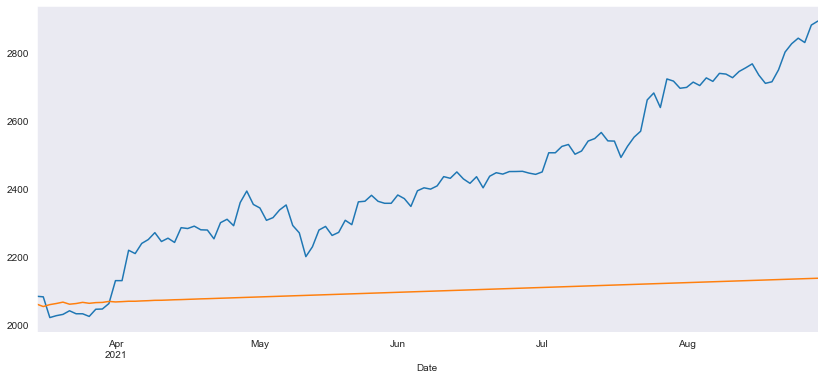

In [26]:
#Evaluate the predictions visiualy
test.Close.plot()
pred.plot()

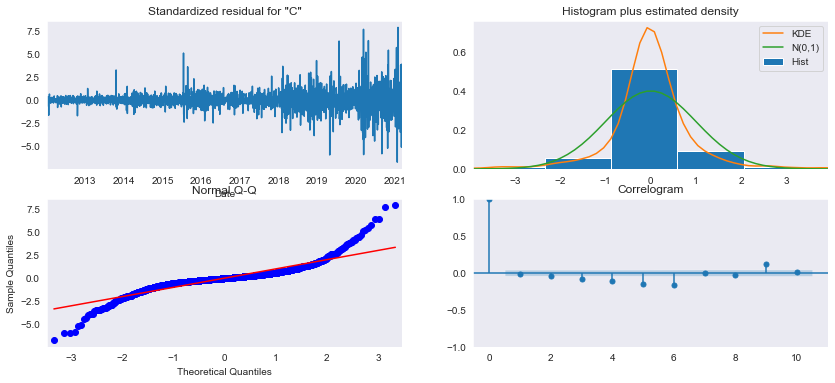

In [27]:
model.plot_diagnostics();

In [28]:
# Evaluate the predictions statisticly 
from statsmodels.tools.eval_measures import rmse

In [29]:
rmse(test.Close,pred)

379.2449009788353

In [30]:
# Trying holt winter method

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
model2 = ExponentialSmoothing(train.Close,trend='multiplicative',seasonal='multiplicative', seasonal_periods=7,freq='B').fit()

In [33]:
pred_2 = model2.forecast(len(test))

<AxesSubplot:xlabel='Date'>

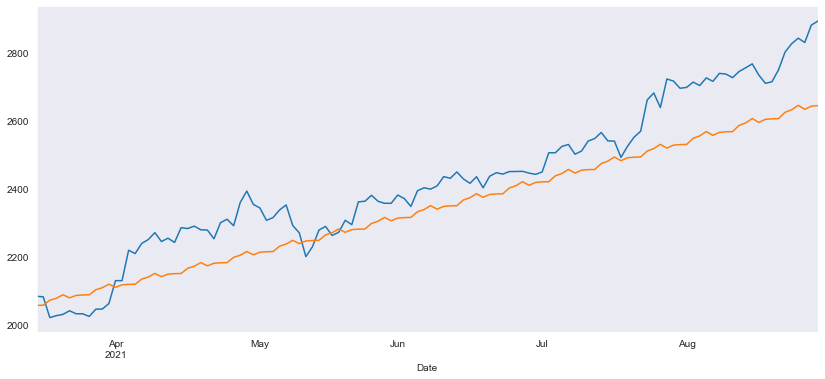

In [34]:
#Evaluate the predictions visiualy
test.Close.plot()
pred_2.plot()

In [35]:
#Evaluate the predictions statisticly
rmse(test.Close,pred_2)

105.05740089955262

In [36]:
# RMSE of Holt-Winter method is performing better than SARIMAX

In [37]:
# fitting the model to the whole data 
Final_Model = ExponentialSmoothing(dfx.Close,trend='multiplicative',seasonal='multiplicative', seasonal_periods=7,freq='B').fit()

In [38]:
# now the model is ready to predict the future stock price

In [39]:
dfx.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-16',
               ...
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30'],
              dtype='datetime64[ns]', name='Date', length=2520, freq='B')